In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("C:/Users/bhard/OneDrive/Desktop/Everything Exist Here/ML/Linear Regression/cgpa_package_data.xlsx")

In [3]:
df.head

<bound method NDFrame.head of      CGPA  Package(LPA)
0    6.47         10.98
1    8.78         19.45
2    9.57          7.28
3    9.45         31.75
4    8.01         22.48
..    ...           ...
175  6.85          3.52
176  8.49         15.96
177  8.24         13.43
178  7.52         25.41
179  5.77          9.25

[180 rows x 2 columns]>

Text(0, 0.5, 'overall cgpa')

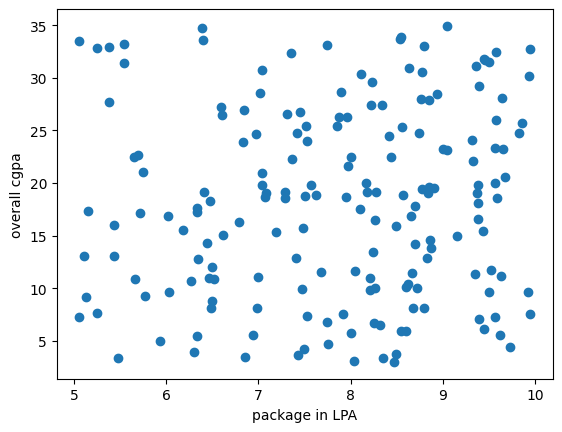

In [4]:
plt.scatter(df["CGPA"], df["Package(LPA)"])
plt.xlabel("package in LPA")
plt.ylabel("overall cgpa")

In [5]:
x = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [6]:
x

,CGPA
0,6.47
1,8.78
2,9.57
3,9.45
4,8.01
...,...
175,6.85
176,8.49
177,8.24
178,7.52


In [7]:
y

0      10.98
1      19.45
2       7.28
3      31.75
4      22.48
       ...  
175     3.52
176    15.96
177    13.43
178    25.41
179     9.25
Name: Package(LPA), Length: 180, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
X_test

,CGPA
12,8.85
23,7.43
179,5.77
25,8.32
35,9.37
13,8.72
65,8.94
173,9.65
112,6.39
48,9.46


In [14]:
Y_test

12     19.65
23      3.64
179     9.25
25      6.55
35     19.05
13     10.05
65     28.44
173    23.23
112    34.69
48     31.70
78      7.33
3      31.75
6      28.13
160    26.94
151    30.60
123    27.46
42      7.68
2       7.28
29     10.91
159    11.53
131    15.31
45     11.04
106    18.84
94     25.39
5      10.69
53      7.52
93     24.77
41     15.42
54     18.32
24      9.86
134    22.07
64     26.31
125    23.97
155    18.70
28     17.64
113    16.46
Name: Package(LPA), dtype: float64

In [15]:
  lr.predict(X_test.iloc[0].values.reshape(1,1))

C:\Users\bhard\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([18.38675417])

In [16]:
lr.predict(X_test.iloc[1].values.reshape(1,1))

C:\Users\bhard\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([18.06361928])

In [17]:
lr.predict(X_test.iloc[2].values.reshape(1,1))

C:\Users\bhard\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17.68587005])

In [18]:
lr.predict(X_test.iloc[4].values.reshape(1,1))

C:\Users\bhard\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([18.50508525])

Text(0, 0.5, 'overall cgpa')

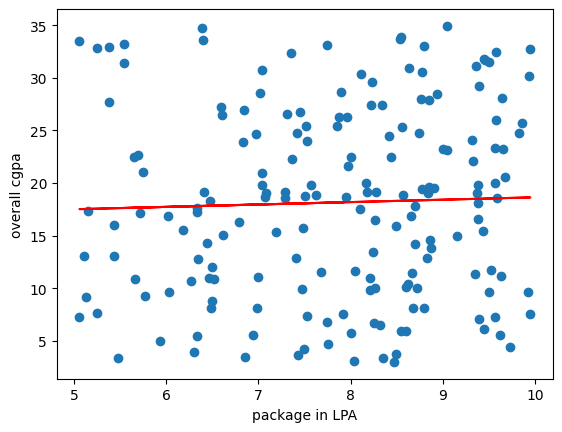

In [19]:
plt.scatter(df["CGPA"], df["Package(LPA)"])
plt.plot(X_train, lr.predict(X_train),color = 'red')
plt.xlabel("package in LPA")
plt.ylabel("overall cgpa")

In [20]:
m = lr.coef_
b = lr.intercept_

CREATING LR CLASS

In [57]:
class meraLR:
    def _init_(self):
        self.m = None
        self.b = None
    def fit(self, X_train, Y_train):
        num = 0
        den = 0
        for i in range(X_train.shape[0]):
            num = num + ((X_train.iloc[i, 0]-X_train.mean())*(Y_train.iloc[i] - Y_train.mean()))
            den = den + ((X_train.iloc[i, 0]-X_train.mean())*(X_train.iloc[i, 0] - X_train.mean()))

        self.m = num/den
        self.b = Y_train.mean() - (self.m * X_train.mean())

        print(self.m)
        print(self.b)
        
    def predict(self, X_test):
        return self.m * X_test + self.b

In [58]:
df = pd.read_excel("C:/Users/bhard/OneDrive/Desktop/Everything Exist Here/ML/Linear Regression/cgpa_package_data.xlsx")

In [59]:
df.head()

,CGPA,Package(LPA)
0,6.47,10.98
1,8.78,19.45
2,9.57,7.28
3,9.45,31.75
4,8.01,22.48


In [60]:
LR = meraLR()

In [61]:
LR.fit(X_train,Y_train)

CGPA    0.22756
dtype: float64
CGPA    16.37285
dtype: float64


In [62]:
print(LR.predict(X_test.iloc[0]))

CGPA    18.386754
dtype: float64


In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [64]:
y_pred = lr.predict(X_test)

In [66]:
Y_test.values

array([19.65,  3.64,  9.25,  6.55, 19.05, 10.05, 28.44, 23.23, 34.69,
       31.7 ,  7.33, 31.75, 28.13, 26.94, 30.6 , 27.46,  7.68,  7.28,
       10.91, 11.53, 15.31, 11.04, 18.84, 25.39, 10.69,  7.52, 24.77,
       15.42, 18.32,  9.86, 22.07, 26.31, 23.97, 18.7 , 17.64, 16.46])

In [67]:
print(mean_absolute_error(Y_test, y_pred))

7.2748036204968844


In [68]:
print(mean_squared_error(Y_test, y_pred))

72.18485065384529


In [69]:
print(np.sqrt(mean_squared_error(Y_test, y_pred)))

8.49616682121092


In [70]:
print(r2_score(Y_test, y_pred))

0.017611494233761182
